In [119]:
import image_slicer 
import cv2 as cv
from numpy import array
from PIL import Image, ImageOps
import numpy as np
import sys, shutil
import os, os.path
import keras
import glob
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Conv2DTranspose, concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Reshape
from sklearn.model_selection import KFold
from numpy import asarray


In [120]:
#num_folds = 5
class_names = ['No0','Yes1']
class_names1 = ['lowerNo0' , 'lowerYes1'] #// folder name
class_names2 = ['upperNo0' , 'upperYes1']
x_train=[]
x_train1=[]
y_train=[]
y_train1=[]

In [121]:



def load_data(folder='C:/Users/Waqar/Desktop/zeeshan/DELL PC/DELL PC/One/Original'):
    for i in range(2):
        file_name = glob.glob(folder +'/'+str(class_names[i])+'/*')
        names=[]
        for path in file_name:
            foldername=os.path.basename(path)
            names.append(foldername)
        for j in range(4):  
            path = folder + "/" + str(class_names[i]) + "/" + str(names[j]) 
            #img=cv.imread(path,cv.IMREAD_GRAYSCALE)
            img = Image.open(path)
            gray_image = ImageOps.grayscale(img)
            PATH = glob.glob(path)
            for img in PATH:
                image_array=[]
                result = image_slicer.slice(img, 4)
                for res in result:
                    image_array.append(res.image)
                with Image.open(path) as im:
                    x, y = im.size
                totalsize = x*y
                if totalsize == 16384:
                    os.remove(path)
                a = np.array(image_array[0])
                b = np.array(image_array[1])
                c = np.array(image_array[2])
                d = np.array(image_array[3])
                #x = np.concatenate((a, b[...,None]), axis=2).shape
                x = np.stack((a,b), axis=2)
                y = np.stack((c,d), axis=2)
                x_train.append(x)
                x_train1.append(y)
    files= []
    path_to_your_files = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Original\No0'
    copy_to_path = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Lowers\lowerNo0'
    copy_to_path1 = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Uppers\upperNo0'
    path_to_your_files1 = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Original\No0'

    files_list = sorted(os.listdir(path_to_your_files))
    orders = range(3, len(files_list) ,4)
    orders1 = range(2, len(files_list) ,4)

    for order in orders:
        files = files_list[order] 
        shutil.move(os.path.join(path_to_your_files, files), os.path.join(copy_to_path, files))

    for a in orders1:
        files = files_list[a] 
        shutil.move(os.path.join(path_to_your_files, files), os.path.join(copy_to_path, files)) 
 
    files_list = sorted(os.listdir(path_to_your_files))
    for f in range(8):
        files = files_list[f]
        shutil.move(os.path.join(path_to_your_files1, files), os.path.join(copy_to_path1, files)) 

    files= []
    path_to_your_files = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Original\Yes1'
    copy_to_path = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Lowers\lowerYes1'
    copy_to_path1 = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Uppers\upperYes1'
    path_to_your_files1 = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Original\Yes1'

    files_list = sorted(os.listdir(path_to_your_files))
    orders = range(3, len(files_list) ,4)
    orders1 = range(2, len(files_list) ,4)

    for order in orders:
        files = files_list[order] 
        shutil.move(os.path.join(path_to_your_files, files), os.path.join(copy_to_path, files))

    for a in orders1:
        files = files_list[a] 
        shutil.move(os.path.join(path_to_your_files, files), os.path.join(copy_to_path, files)) 

    files_list = sorted(os.listdir(path_to_your_files))
    for f in range(8):
        files = files_list[f]
        shutil.move(os.path.join(path_to_your_files1, files), os.path.join(copy_to_path1, files)) 
    Folder = r"C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Lowers"
    for g in range(2):
        file_name = glob.glob(Folder +'/'+str(class_names1[i])+'/*')
        names=[]
        for path in file_name:
            foldername=os.path.basename(path)
            names.append(foldername)
        for h in range(4):  
            path = Folder + "/" + str(class_names1[i]) + "/" + str(names[j]) 
            img = Image.open(path)
            gray_image = ImageOps.grayscale(img)
            PATH = glob.glob(path) 
            y_train.append(g)
    Folder1 = r"C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Uppers" 
    for g1 in range(2):
        file_name = glob.glob(Folder1 +'/'+str(class_names2[i])+'/*')
        names=[]
        for path in file_name:
            foldername=os.path.basename(path)
            names.append(foldername)
        for h in range(4):  
            path = Folder1 + "/" + str(class_names2[i]) + "/" + str(names[j]) 
            img = Image.open(path)
            gray_image = ImageOps.grayscale(img)
            PATH = glob.glob(path)
            y_train1.append(g1)

    return ((np.array(x_train),np.array(y_train)) , (np.array(x_train1),np.array(y_train1)))
    

In [122]:
(x_train, y_train) ,(x_train1,y_train1) = load_data()

print('y_train :' , y_train)
print('y_train1 :' , y_train1)

y_train : [0 0 0 0 1 1 1 1]
y_train1 : [0 0 0 0 1 1 1 1]


In [123]:
batch_size = 10
num_classes = 2
epochs = 100

In [124]:

x_test=[]
y_test=[] 
x_test1=[]
y_test1=[]


x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train1, y_train1, test_size=0.2)

x_train = x_train.astype('float32')
x_train1 = x_train1.astype('float32')
x_test = x_test.astype('float32')
x_test1 = x_test1.astype('float32')

x_train /= 255
x_train1 /= 255
x_test /= 255
x_test1 /= 255

x_train = x_train.reshape(x_train.shape[0],64, 64, 2) #upper region
x_test  = x_test.reshape(x_test.shape[0],64,64, 2)
x_train1 = x_train1.reshape(x_train1.shape[0],64, 64, 2) #lower region
x_test1 = x_test1.reshape(x_test1.shape[0],64, 64, 2)

print('x_train :', x_train.shape)
print('x_train1 :', x_train1.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train1.shape[0], 'train1 samples')
print(x_test1.shape[0], 'test1 samples')

y_train = keras.utils.to_categorical(y_train, num_classes) #no. of classes -> 0 (no fluid) & 1 (fluid) => 
y_test  = keras.utils.to_categorical(y_test, num_classes)
y_train1 = keras.utils.to_categorical(y_train1, num_classes)
y_test1  = keras.utils.to_categorical(y_test1, num_classes) 


x_train : (6, 64, 64, 2)
x_train1 : (6, 64, 64, 2)
6 train samples
2 test samples
6 train1 samples
2 test1 samples


In [133]:



#global input_layer1

#input_layer = Input((64, 64, 2)) # NO NEED TO REPEAT
#input_layer1 = Input((64, 64, 2))

def build_model(input_layer, start_neurons):
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer) #flattening the matrices
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)
    
    # Middle -> reverse traversal
    convm = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    convm = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(convm)
    
    # STEP 3 dECONVULATION -> PAPA'S PRINCESS
    deconv1= Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    
     
    W1= [0.4,0.4]
    W2 = [0.8,0.8]
    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1) #sigmoid function is used to return the bool daa based of real numbers  
    output_layer1 = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1)
    R1= output_layer*W1
    R2= output_layer1*W2
  
    out = Flatten()(R1)
    out1 =Flatten()(R2)
    merge = concatenate([out, out1])
    out_put = Dense(2)(merge)
    
    model = Model(inputs=input_layer, outputs= out_put)

    
    return model

In [134]:


input_layer = Input((64, 64, 2))
model = build_model(input_layer, 4)
model.compile(optimizer="Adam", loss="mse", metrics=["mae", "acc"])



#  mode = unet_model(input_layer, 4) #while calling it seems it will only be using layer0 -> sam's smelly code
#model1 = unet_model(input_layer1, 4)#while calling it seems it will only be using layer1

hist= model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test, y_test))
hist1= model.fit(x_train1, y_train1, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test1, y_test1))

scores = model.evaluate(x_test, y_test,verbose=1)
scores1 = model.evaluate(x_test1, y_test1,verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print('Test loss:', scores1[0])
print('Test accuracy:', scores1[1])

Train on 6 samples, validate on 2 samples
Epoch 1/100
6/6 [==============================] - 2s 292ms/sample - loss: 0.3151 - mean_absolute_error: 0.4978 - acc: 0.5000 - val_loss: 22.1816 - val_mean_absolute_error: 4.6836 - val_acc: 0.5000
Epoch 2/100
6/6 [==============================] - 0s 16ms/sample - loss: 22.3701 - mean_absolute_error: 4.7030 - acc: 0.5000 - val_loss: 1.6542 - val_mean_absolute_error: 1.1871 - val_acc: 1.0000
Epoch 3/100
6/6 [==============================] - 0s 18ms/sample - loss: 1.6894 - mean_absolute_error: 1.1979 - acc: 0.5000 - val_loss: 5.0838 - val_mean_absolute_error: 2.1996 - val_acc: 0.5000
Epoch 4/100
6/6 [==============================] - 0s 20ms/sample - loss: 5.1268 - mean_absolute_error: 2.2082 - acc: 0.5000 - val_loss: 12.7672 - val_mean_absolute_error: 3.5384 - val_acc: 0.5000
Epoch 5/100
6/6 [==============================] - 0s 20ms/sample - loss: 12.8626 - mean_absolute_error: 3.5513 - acc: 0.5000 - val_loss: 9.2170 - val_mean_absolute_error

Epoch 43/100
6/6 [==============================] - 0s 20ms/sample - loss: 0.3926 - mean_absolute_error: 0.4974 - acc: 0.5000 - val_loss: 0.4536 - val_mean_absolute_error: 0.5003 - val_acc: 0.5000
Epoch 44/100
6/6 [==============================] - 0s 20ms/sample - loss: 0.4562 - mean_absolute_error: 0.5000 - acc: 0.6667 - val_loss: 0.3829 - val_mean_absolute_error: 0.5004 - val_acc: 0.5000
Epoch 45/100
6/6 [==============================] - 0s 21ms/sample - loss: 0.3827 - mean_absolute_error: 0.5005 - acc: 0.5000 - val_loss: 0.2779 - val_mean_absolute_error: 0.5004 - val_acc: 0.5000
Epoch 46/100
6/6 [==============================] - 0s 15ms/sample - loss: 0.2777 - mean_absolute_error: 0.4996 - acc: 0.5000 - val_loss: 0.2587 - val_mean_absolute_error: 0.5004 - val_acc: 0.5000
Epoch 47/100
6/6 [==============================] - 0s 17ms/sample - loss: 0.2599 - mean_absolute_error: 0.5013 - acc: 0.5000 - val_loss: 0.3239 - val_mean_absolute_error: 0.5004 - val_acc: 0.5000
Epoch 48/100
6/

Epoch 85/100
6/6 [==============================] - 0s 16ms/sample - loss: 0.2497 - mean_absolute_error: 0.4993 - acc: 0.5000 - val_loss: 0.2528 - val_mean_absolute_error: 0.5005 - val_acc: 0.5000
Epoch 86/100
6/6 [==============================] - 0s 17ms/sample - loss: 0.2530 - mean_absolute_error: 0.5007 - acc: 0.5000 - val_loss: 0.2531 - val_mean_absolute_error: 0.5005 - val_acc: 0.5000
Epoch 87/100
6/6 [==============================] - 0s 18ms/sample - loss: 0.2516 - mean_absolute_error: 0.4992 - acc: 0.5000 - val_loss: 0.2515 - val_mean_absolute_error: 0.5006 - val_acc: 0.5000
Epoch 88/100
6/6 [==============================] - 0s 18ms/sample - loss: 0.2497 - mean_absolute_error: 0.4987 - acc: 0.5000 - val_loss: 0.2507 - val_mean_absolute_error: 0.5006 - val_acc: 0.5000
Epoch 89/100
6/6 [==============================] - 0s 16ms/sample - loss: 0.2516 - mean_absolute_error: 0.5014 - acc: 0.5000 - val_loss: 0.2515 - val_mean_absolute_error: 0.5006 - val_acc: 0.5000
Epoch 90/100
6/

Epoch 26/100
6/6 [==============================] - 0s 17ms/sample - loss: 0.2265 - mean_absolute_error: 0.4587 - acc: 0.6667 - val_loss: 0.4387 - val_mean_absolute_error: 0.6623 - val_acc: 0.0000e+00
Epoch 27/100
6/6 [==============================] - 0s 17ms/sample - loss: 0.2218 - mean_absolute_error: 0.4446 - acc: 0.6667 - val_loss: 0.4793 - val_mean_absolute_error: 0.6923 - val_acc: 0.0000e+00
Epoch 28/100
6/6 [==============================] - 0s 19ms/sample - loss: 0.2265 - mean_absolute_error: 0.4392 - acc: 0.6667 - val_loss: 0.4959 - val_mean_absolute_error: 0.7042 - val_acc: 0.0000e+00
Epoch 29/100
6/6 [==============================] - 0s 19ms/sample - loss: 0.2227 - mean_absolute_error: 0.4299 - acc: 0.6667 - val_loss: 0.4784 - val_mean_absolute_error: 0.6916 - val_acc: 0.0000e+00
Epoch 30/100
6/6 [==============================] - 0s 17ms/sample - loss: 0.2260 - mean_absolute_error: 0.4392 - acc: 0.6667 - val_loss: 0.4432 - val_mean_absolute_error: 0.6657 - val_acc: 0.0000

Epoch 67/100
6/6 [==============================] - 0s 16ms/sample - loss: 0.2212 - mean_absolute_error: 0.4418 - acc: 0.6667 - val_loss: 0.4412 - val_mean_absolute_error: 0.6642 - val_acc: 0.0000e+00
Epoch 68/100
6/6 [==============================] - 0s 18ms/sample - loss: 0.2203 - mean_absolute_error: 0.4427 - acc: 0.6667 - val_loss: 0.4365 - val_mean_absolute_error: 0.6607 - val_acc: 0.0000e+00
Epoch 69/100
6/6 [==============================] - 0s 19ms/sample - loss: 0.2214 - mean_absolute_error: 0.4448 - acc: 0.6667 - val_loss: 0.4358 - val_mean_absolute_error: 0.6601 - val_acc: 0.0000e+00
Epoch 70/100
6/6 [==============================] - 0s 19ms/sample - loss: 0.2244 - mean_absolute_error: 0.4486 - acc: 0.6667 - val_loss: 0.4407 - val_mean_absolute_error: 0.6638 - val_acc: 0.0000e+00
Epoch 71/100
6/6 [==============================] - 0s 17ms/sample - loss: 0.2245 - mean_absolute_error: 0.4480 - acc: 0.6667 - val_loss: 0.4488 - val_mean_absolute_error: 0.6699 - val_acc: 0.0000

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

y_pred= model.predict(x_test)
y_true= y_test
y_pred=np.argmax(y_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

cm=confusion_matrix(y_true,y_pred)


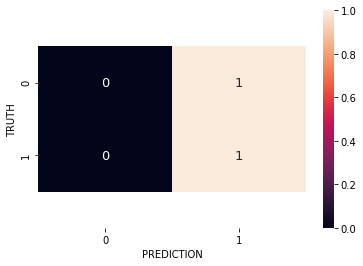

In [128]:
#cm = np.array([[41,0],[13,30]])
sns.heatmap(cm,annot=True,linecolor="white",annot_kws={"size": 13})
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.xlabel("PREDICTION")
plt.ylabel("TRUTH")
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [129]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([41, 0], [43, 0], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [130]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.50


In [131]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

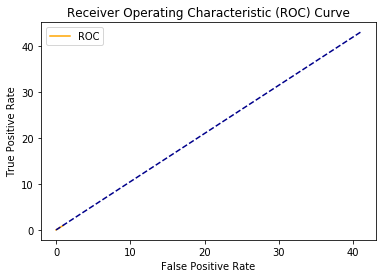

In [132]:
plot_roc_curve(fpr, tpr)